In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import gender_guesser.detector as gender
from genderize import Genderize



# Load and merge data

In [2]:
# data from:
# https://www.imdb.com/interfaces/


fpath = "./title.crew.tsv/data.tsv"
df_crew = pd.read_csv(fpath, sep='\t')

fpath = "./title.ratings.tsv/data.tsv"
df_ratings = pd.read_csv(fpath, sep='\t')

fpath = "./name.basics.tsv/data.tsv"
df_name = pd.read_csv(fpath, sep='\t')

fpath = "./title.basics.tsv/data.tsv"
df_title = pd.read_csv(fpath, sep='\t')

C:\Users\CANCELLIERIE\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print('len artist names:', len(df_name)   )
print('len ratings file:', len(df_ratings))
print('len crew file   :', len(df_crew)   )
print('len movie title :', len(df_title)  )
df_name.head()
df_ratings.head()
df_crew.head()
df_title.head()

len artist names: 9604401
len ratings file: 976773
len crew file   : 6193756
len movie title : 6193756


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [29]:
df_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [18]:
df_merged = pd.merge(df_ratings, df_crew[ ['tconst', 'directors'  ]], left_on='tconst'   , right_on='tconst')
df_merged = pd.merge(df_merged , df_title[['tconst','primaryTitle']], left_on='tconst'   , right_on='tconst')
df_merged = pd.merge(df_merged , df_name[ ['nconst','primaryName' ]], left_on='directors', right_on='nconst')
df_merged = df_merged.rename(columns={'primaryName': "DirectorName"}).drop(['nconst'], axis=1)
print('# of Titles with Ratings and Crew and Artist NAme:',len(df_merged))
df_merged.head()

# of Titles with Ratings and Crew and Artist NAme: 723690


,tconst,averageRating,numVotes,directors,primaryTitle,DirectorName
0,tt0000001,5.6,1538,nm0005690,Carmencita,William K.L. Dickson
1,tt0000005,6.1,1909,nm0005690,Blacksmith Scene,William K.L. Dickson
2,tt0000006,5.2,102,nm0005690,Chinese Opium Den,William K.L. Dickson
3,tt0000008,5.4,1643,nm0005690,Edison Kinetoscopic Record of a Sneeze,William K.L. Dickson
4,tt0000036,4.5,449,nm0005690,Awakening of Rip,William K.L. Dickson


# Define gender

In [19]:
d = gender.Detector()
def get_gender_from_name(x):
    return d.get_gender(x)

df_merged['DirectorFirstName'] = df_merged['DirectorName'].str.split().str[0]
df_merged['DirectorGender']    = df_merged['DirectorFirstName'].apply(get_gender_from_name)
print('# Different names:', df_merged['DirectorName'].nunique())
print('# Unknown gender :', df_merged[df_merged['DirectorGender'] == 'unknown']['DirectorName'].nunique())
print('Names cathegories:', df_merged['DirectorGender'].unique())
df_merged.head()

# Different names: 152330
# Unknown gender : 20843
Names cathegories: ['male' 'unknown' 'female' 'mostly_male' 'mostly_female' 'andy']


,tconst,averageRating,numVotes,directors,primaryTitle,DirectorName,DirectorFirstName,DirectorGender
0,tt0000001,5.6,1538,nm0005690,Carmencita,William K.L. Dickson,William,male
1,tt0000005,6.1,1909,nm0005690,Blacksmith Scene,William K.L. Dickson,William,male
2,tt0000006,5.2,102,nm0005690,Chinese Opium Den,William K.L. Dickson,William,male
3,tt0000008,5.4,1643,nm0005690,Edison Kinetoscopic Record of a Sneeze,William K.L. Dickson,William,male
4,tt0000036,4.5,449,nm0005690,Awakening of Rip,William K.L. Dickson,William,male


# Compare Gender vs Ratings

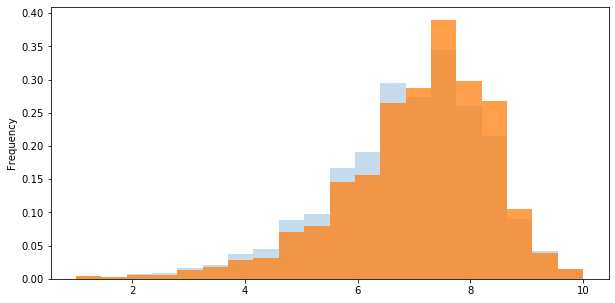

In [26]:
gender1 = 'male'
gender2 = 'mostly_female'
ax = df_merged[df_merged['DirectorGender'] == gender1]['averageRating'].plot.hist(bins=20,alpha=0.25,density=True,figsize=fs)
ax = df_merged[df_merged['DirectorGender'] == gender2]['averageRating'].plot.hist(bins=20,alpha=0.75,density=True,figsize=fs)